In [1]:
import sys
sys.path.append("../")
sys.path.append("../Modules/")

import os

import numpy as np

%cd ../scripts/

/home/drfrbc/Neural-Modeling/scripts


In [2]:
sim_directory = '10-06-2024-11-53-41-TestingSomaPCsAnd2ndBasals'

In [3]:
save = True
save_directory = f"../notebooks/{sim_directory}"#f"../notebooks/{sim.title}"
os.makedirs(save_directory, exist_ok=True)

In [4]:
# # this one is for if plotting the seg_data directly from cell obj instance

# %matplotlib widget

# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from ipywidgets import interactive, fixed, FloatSlider
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from ipywidgets import interactive, FloatSlider, fixed
# from IPython.display import display

# # Setup a global reference for figure and axes
# fig, ax = None, None

# def plot_segments(seg_data, elevation=0, azimuth=-100, radius_scale=1.0, deleted_indices=[]):
#     global fig, ax
#     if fig is None or ax is None:
#         plt.close('all')  # Close any existing plots
#         fig = plt.figure()
#         ax = fig.add_subplot(111, projection='3d')
#     else:
#         ax.cla()  # Clear the existing axes

#     for i, seg in enumerate(seg_data):
#         x_points = [seg.coords['p0_0'].iloc[0], seg.coords['pc_0'].iloc[0], seg.coords['p1_0'].iloc[0]]
#         y_points = [seg.coords['p0_1'].iloc[0], seg.coords['pc_1'].iloc[0], seg.coords['p1_1'].iloc[0]]
#         z_points = [seg.coords['p0_2'].iloc[0], seg.coords['pc_2'].iloc[0], seg.coords['p1_2'].iloc[0]]

#         radius = seg.coords['r'].iloc[0] * radius_scale
#         color = 'red' if i in deleted_indices else 'black'
#         radius = radius*0.1 if i in deleted_indices else radius # can adjust multiplier to increase red radius
#         ax.plot(x_points, z_points, y_points, linewidth=radius, color=color)

#     ax.view_init(elev=elevation, azim=azimuth)
#     ax.set_xlabel('X')
#     ax.set_ylabel('Z')
#     ax.set_zlabel('Y')
    
# class Interactive3DPlot:
#     def __init__(self):
#         # Initialize the plot without showing it
#         self.fig, self.ax = plt.subplots(subplot_kw={'projection': '3d'})

#     def plot_segments(self, seg_data, elevation=20, azimuth=-100, radius_scale=1.0, deleted_indices=[]):
#         self.ax.cla()  # Clear the existing axes

#         for i, seg in enumerate(seg_data):
#             x_points = [seg.coords['p0_0'].iloc[0], seg.coords['pc_0'].iloc[0], seg.coords['p1_0'].iloc[0]]
#             y_points = [seg.coords['p0_1'].iloc[0], seg.coords['pc_1'].iloc[0], seg.coords['p1_1'].iloc[0]]
#             z_points = [seg.coords['p0_2'].iloc[0], seg.coords['pc_2'].iloc[0], seg.coords['p1_2'].iloc[0]]

#             radius = seg.coords['r'].iloc[0] * radius_scale
#             color = 'red' if i in deleted_indices else 'black'
#             radius = radius*10 if i in deleted_indices else radius
#             self.ax.plot(x_points, z_points, y_points, linewidth=radius, color=color)

#         self.ax.view_init(elev=elevation, azim=azimuth)
#         self.ax.set_xlabel('X')
#         self.ax.set_ylabel('Z')
#         self.ax.set_zlabel('Y')

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interactive, FloatSlider, fixed
from IPython.display import display

# Setup a global reference for figure and axes
fig, ax = None, None

def plot_segments(seg_data, elevation=0, azimuth=-100, radius_scale=1.0, deleted_indices=[]):
    global fig, ax
    if fig is None or ax is None:
        plt.close('all')  # Close any existing plots
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    else:
        ax.cla()  # Clear the existing axes

    for i, seg in seg_data.iterrows():
        x_points = [seg['p0_0'], seg['pc_0'], seg['p1_0']]
        y_points = [seg['p0_1'], seg['pc_1'], seg['p1_1']]
        z_points = [seg['p0_2'], seg['pc_2'], seg['p1_2']]

        radius = seg['r'] * radius_scale
        color = 'red' if i in deleted_indices else 'black'
        radius = radius * 0.1 if i in deleted_indices else radius  # can adjust multiplier to increase red radius
        ax.plot(x_points, z_points, y_points, linewidth=radius, color=color)

    ax.view_init(elev=elevation, azim=azimuth)
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')
    
    return fig

class Interactive3DPlot:
    def __init__(self):
        # Initialize the plot without showing it
        self.fig, self.ax = plt.subplots(subplot_kw={'projection': '3d'})

    def plot_segments(self, seg_data, elevation=20, azimuth=-100, radius_scale=1.0, deleted_indices=[]):
        self.ax.cla()  # Clear the existing axes

        for i, seg in seg_data.iterrows():
            x_points = [seg['p0_0'], seg['pc_0'], seg['p1_0']]
            y_points = [seg['p0_1'], seg['pc_1'], seg['p1_1']]
            z_points = [seg['p0_2'], seg['pc_2'], seg['p1_2']]

            radius = seg['r'] * radius_scale
            color = 'red' if i in deleted_indices else 'black'
            radius = radius * 10 if i in deleted_indices else radius
            self.ax.plot(x_points, z_points, y_points, linewidth=radius, color=color)

        self.ax.view_init(elev=elevation, azim=azimuth)
        self.ax.set_xlabel('X')
        self.ax.set_ylabel('Z')
        self.ax.set_zlabel('Y')

# Example usage
# Assuming seg_data is a pandas DataFrame containing your data
# plot_segments(seg_data)
# interactive_plot = Interactive3DPlot()
# interactive_plot.plot_segments(seg_data)


In [14]:
def group_directories_by_prefix(directory_path):
    '''Groupes simulations by cell'''
    grouped_directories = {}
    for folder_name in os.listdir(directory_path):
        full_path = os.path.join(directory_path, folder_name)
        if os.path.isdir(full_path):
            parts = folder_name.split('_')
            if len(parts) > 2:  # case where basename_seed_ampINT
                celltype = parts[0]
                seed = parts[1]
                if celltype not in grouped_directories:
                    grouped_directories[celltype] = {}
                if seed not in grouped_directories[celltype]:
                    grouped_directories[celltype][seed] = []
                grouped_directories[celltype][seed].append(full_path)
            else:
                raise ValueError("Folder name format is incorrect, expected 'basename_seed_ampINT'")
    return grouped_directories

Complex


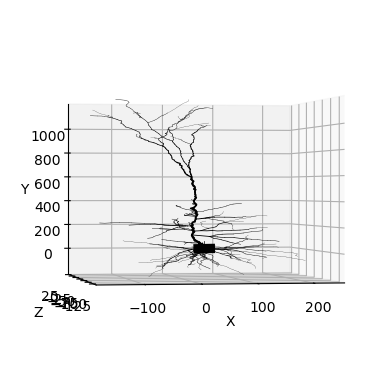

Branches


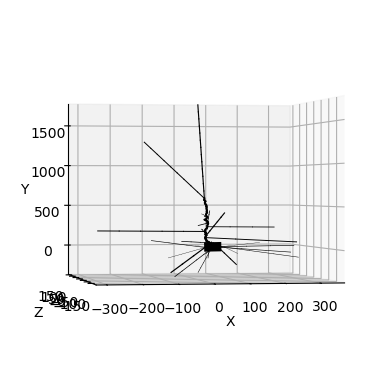

Trees


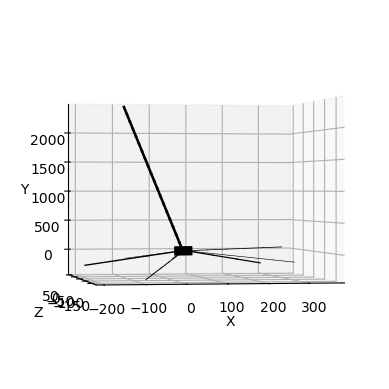

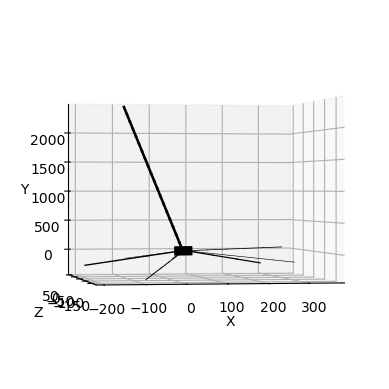

In [15]:
from scripts.compare_fi import group_directories_by_prefix
import pandas as pd
grouped_directories = group_directories_by_prefix(sim_directory)

for celltype, seeds in grouped_directories.items():
    print(celltype)
    seg_data = pd.read_csv(os.path.join(f"{sim_directory}/{celltype}_{list(seeds.keys())[0]}_EXCinc0.0", "segment_data.csv"))
    display(plot_segments(seg_data))
    # plot = Interactive3DPlot() # this won't work without separate variables so it cannot be done in a loop I think
    # interactive_plot = interactive(plot.plot_segments, 
    #                             seg_data=fixed(seg_data),
    #                             elevation=(-90, 90, 1),
    #                             azimuth=(-180, 180, 1),
    #                             radius_scale=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0),
    #                             deleted_indices=[]#fixed(all_deleted_seg_indices)
    #                             )

In [ ]:
# # The above interactive plot but not in a loop

# # Ensure %matplotlib widget is enabled for interactive matplotlib in Jupyter
# %matplotlib widget

# plot1 = Interactive3DPlot()
# plot2 = Interactive3DPlot()
# plot3 = Interactive3DPlot()

# # Setup interactive widgets for each plot
# interactive_plot1 = interactive(plot1.plot_segments, 
#                                 seg_data=fixed(seg_data),
#                                 elevation=(-90, 90, 1),
#                                 azimuth=(-180, 180, 1),
#                                 radius_scale=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0),
#                                 deleted_indices=fixed(all_deleted_seg_indices))

# interactive_plot2 = interactive(plot2.plot_segments, 
#                                 seg_data=fixed(new_seg_data),
#                                 elevation=(-90, 90, 1),
#                                 azimuth=(-180, 180, 1),
#                                 radius_scale=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0),
#                                 deleted_indices=fixed(new_seg_indices))

# interactive_plot3 = interactive(plot3.plot_segments, 
#                                 seg_data=fixed(new_seg_data_all),
#                                 elevation=(-90, 90, 1),
#                                 azimuth=(-180, 180, 1),
#                                 radius_scale=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0),
#                                 deleted_indices=fixed(new_seg_indices_all))

# display(interactive_plot1)
# display(interactive_plot2)
# display(interactive_plot3)